In [1]:
import cv2
import pytesseract as tess
import numpy as np
import matplotlib.pyplot as plt
import time
from imutils import contours as sortCnt

In [10]:
st = time.time()
time.sleep(10)
ed = time.time()
print(ed-st,"sec")

10.000804662704468 sec


In [2]:
cap = cv2.VideoCapture("0 - 2020-01-12 06-42-00-715.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

2308.0

In [7]:
cap.set(cv2.CAP_PROP_POS_FRAMES,int(totalFrames/2))

True

(576, 704, 3)


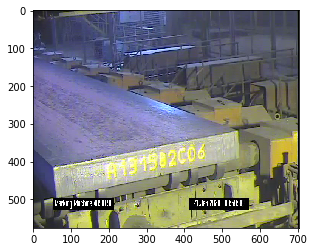

In [8]:
ret, frame = cap.read()
imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
plt.imshow(frame)

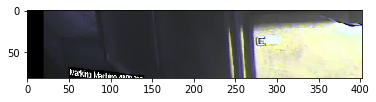

In [6]:
#pts1 = np.float32([[298,407],[630+20,344],[298,488],[630+20,407]])
#pts2 = np.float32([[0,0],[1800,0],[0,500],[1800,500]])

#1----------2
#-          -
#-          -
#3----------4

#pts1 = np.float32([[115,417-7],[509,340-7],[115,490],[509,400]])
pts1 = np.float32([[115-150,417-7-50],[509+50,340-7-50],[115-150,490+50],[509+50,400+50]])
pts2 = np.float32([[0,0],[352,0],[0,81],[352,81]])

M = cv2.getPerspectiveTransform(pts1,pts2)

#dst = cv2.warpPerspective(allFrames[-450],M,(352,81))
dst = cv2.warpPerspective(frame,M,(402,81))

plt.imshow(dst,"gray")

In [7]:
#cv2.imwrite("templateOCR1.jpg",dst)

Marking Marne. an...


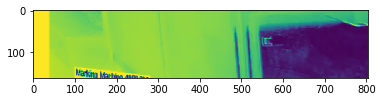

In [8]:
blankSlab = cv2.imread("blankSlab.jpg",0)

blankSlab = cv2.resize(blankSlab,(blankSlab.shape[1]*2,blankSlab.shape[0]*2), cv2.INTER_AREA)
dst = cv2.resize(dst,(dst.shape[1]*2,dst.shape[0]*2), cv2.INTER_AREA)

dstGray = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)
diff = cv2.bitwise_not( dstGray, blankSlab)
print(tess.image_to_string(diff))
plt.imshow(diff)

In [9]:
#%matplotlib notebook

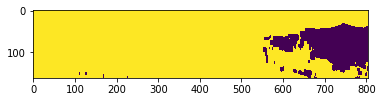

In [10]:
gray = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)
_,x = cv2.threshold(diff,12,255,cv2.THRESH_BINARY)
adThresh = cv2.adaptiveThreshold(diff,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY ,191*3,25)
erosion = cv2.erode(x,(3,3),iterations = 6)
plt.imshow(erosion)

In [11]:
#cv2.imwrite("templateOCR.jpg",erosion)

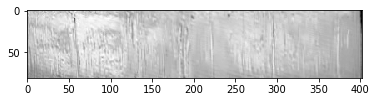

In [12]:
template = cv2.imread('blankSlab.jpg',0)
plt.imshow(template,"gray")

In [13]:
template = cv2.imread('blankSlab.jpg',0)
w, h = template.shape[::-1]


while(True):
    ret, img = cap.read()
    
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #pts1 = np.float32([[115-150,417-7-50],[509+50,340-7-50],[115-150,490+50],[509+50,400+50]])
    pts1 = np.float32([[115,417-7],[509,340-7],[115,490],[509,400]])
    pts2 = np.float32([[0,0],[352,0],[0,81],[352,81]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    #dst = cv2.warpPerspective(allFrames[-450],M,(352,81))
    dst = cv2.warpPerspective(img_gray,M,(402,81))

    diff = cv2.bitwise_not( dst, template)
    _,x = cv2.threshold(diff,18,255,cv2.THRESH_BINARY)
    
    #adThresh = cv2.adaptiveThreshold(diff,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY ,191*3,25)
    erosion = cv2.erode(x,(3,3),iterations = 4)
    #blank = np.zeros(erosion.shape)
    _ , contours, hierarchy =   cv2.findContours(erosion.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    # cntr Order
    print(len(cnts))
    if len(cnts) > 20:
        ocr = tess.image_to_string(erosion, config="--psm 13")
        if len(ocr) > 8:
            print(ocr)
            if ocr[0] == "A":
                break
                #time.sleep(.9)
                #cv2.rectangle

    '''epsilon = 0.0001*cv2.arcLength(cnts[0],True)
    approx = cv2.approxPolyDP(cnts[0],epsilon,True)'''

    #
    #cnts, bBox = sortCnt.sort_contours(cnts[1:11])
    
    #print(tess.image_to_string(erosion, lang = 'eng' , config="--psm 13 ",))

    
    ''' res = cv2.matchTemplate(img_gray[417-7-50-25:490+50+25,115-150-25:509+50+25],template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.7
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        #cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
        save = img_gray.copy()
        print("yes")
        break
   ''' 
    
    
    cv2.imshow('img ',img)
    cv2.imshow("ocr",erosion)
    #time.sleep(0.9)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


25
20
26
26
28
19
24
20
23
23
23
27
23
15
19
20
13
16
14
13
14
11
10
11
9
9
7
4
4
3
3
3
4
4
4
4
5
4
5
3
4
4
3
2
1
2
4
2
5
3
6
4
2
4
5
3
4
2
2
3
2
3
3
2
3
3
2
2
2
4
2
4
3
4
3
4
4
4
2
3
3
3
2
3
4
4
4
2
6
1
2
2
2
4
4
3
2
2
3
1
3
4
2
2
3
3
1
2
1
3
1
2
2
4
2
3
2
2
4
2
2
3
2
3
3
3
4
2
2
3
3
1
2
3
5
5
5
3
3
6
6
8
7
6
4
6
8
6
6
6
5
7
7
7
5
5
6
6
5
6
7
7
6
6
6
6
5
5
5
6
5
5
5
5
5
5
6
5
5
3
4
5
5
3
6
4
4
4
3
5
4
5
4
5
5
8
4
5
3
5
6
5
4
4
5
6
3
4
5
4
3
3
3
4
5
5
3
3
3
4
3
4
3
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
4
1
1
1
1
1
1
1
1
2
1
1
1
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
3
4
3
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
3
3
1
1
1
6
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1


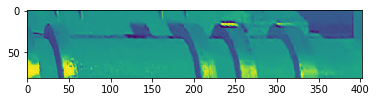

In [14]:
plt.imshow(dst)

In [19]:
#break

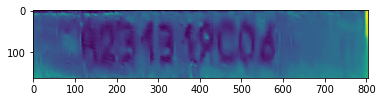

In [15]:
blankSlab = cv2.imread("blankSlab.jpg",0)

blankSlab = cv2.resize(blankSlab,(blankSlab.shape[1]*2,blankSlab.shape[0]*2), cv2.INTER_AREA)
dst = cv2.resize(dst,(dst.shape[1]*2,dst.shape[0]*2), cv2.INTER_AREA)

#dstGray = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)
diff = cv2.bitwise_not( dst, blankSlab)
print(tess.image_to_string(diff))
plt.imshow(diff)

In [16]:
#gray = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)
_,x = cv2.threshold(diff,21,255,cv2.THRESH_BINARY)
adThresh = cv2.adaptiveThreshold(diff,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY ,191*3,25)

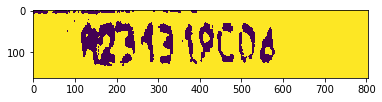

In [17]:
erosion = cv2.erode(x,(3,3),iterations = 3)
plt.imshow(erosion)

In [18]:
blank = np.zeros(erosion.shape)
_ , contours, hierarchy =   cv2.findContours(erosion.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key = cv2.contourArea,reverse= True)
# cntr Order
print(len(cnts))

'''epsilon = 0.0001*cv2.arcLength(cnts[0],True)
approx = cv2.approxPolyDP(cnts[0],epsilon,True)'''

#
cnts, bBox = sortCnt.sort_contours(cnts[1:11])
    
#print(cnts)

35


In [19]:
bBox

((115, 26, 131, 110),
 (152, 58, 33, 62),
 (259, 28, 32, 99),
 (300, 31, 38, 76),
 (363, 33, 32, 97),
 (397, 28, 38, 96),
 (441, 48, 43, 78),
 (493, 51, 22, 77),
 (501, 31, 32, 87),
 (544, 39, 37, 88))

In [20]:
len(bBox)

10

In [21]:
bbbbBox = []
for i,box in enumerate (bBox):
    bbbbBox.append(list(box))
#print(bbbbBox,"\n",len(bbbbBox))
print(bbbbBox[0][0])
for i,boxxx in enumerate (bbbbBox):
    if i == len(bbbbBox)-1:
        break
    if (bbbbBox[i+1][0] - boxxx[0] ) <= 60:
        del bbbbBox[i+1]
        i+=1
    
    #print(i,box)

115


In [22]:
bbbbBox


[[115, 26, 131, 110],
 [259, 28, 32, 99],
 [363, 33, 32, 97],
 [441, 48, 43, 78],
 [501, 31, 32, 87]]

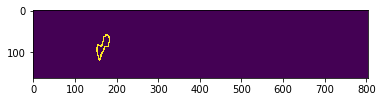

In [23]:
ordr = 1
dstCnt = cv2.drawContours(blank.copy(),cnts,ordr,(255),2)
plt.imshow(dstCnt)

In [24]:
bBox = list (bBox)

In [25]:

bBox

[(115, 26, 131, 110),
 (152, 58, 33, 62),
 (259, 28, 32, 99),
 (300, 31, 38, 76),
 (363, 33, 32, 97),
 (397, 28, 38, 96),
 (441, 48, 43, 78),
 (493, 51, 22, 77),
 (501, 31, 32, 87),
 (544, 39, 37, 88)]

In [26]:
# --psm 13 it should works, because it will consider it as a raw text line, without searching for pages and paragraphs.
for i in bBox:
    x = erosion[i[1]-10:i[1]+105,i[0]-5:i[0]+50]
    print(tess.image_to_string(x, lang = 'eng' , config="--psm 13 --oem 1 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ",))
    cv2.imshow("sbjhkj",x)
    cv2.waitKey(0)
cv2.destroyAllWindows()



4
3

9



6


In [27]:
break

SyntaxError: 'break' outside loop (<ipython-input-27-6aaf1f276005>, line 4)

In [9]:
while(True):
    ret, img = cap.read()
    
    pts1 = np.float32([[115,417],[509,340],[115,490],[509,400]])
    pts2 = np.float32([[0,0],[352,0],[0,81],[352,81]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    #dst = cv2.warpPerspective(allFrames[-450],M,(352,81))
    dst = cv2.warpPerspective(img,M,(402,81))
    dst_2 = cv2.resize(dst,(dst.shape[1]*2,dst.shape[0]*2), cv2.INTER_AREA)
    
    cv2.imshow('img ',dst)
    cv2.imshow("full",img)
    cv2.imshow("2x",dst_2)
    time.sleep(0.09)
   
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

# OOOOOOOOOOOOOOOPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP

In [9]:
c = np.load("imgPoints.npy")
c

array([[111,  27,  42,  97],
       [157,  22,  38, 101],
       [202,  23,  38,  98],
       [253,  24,  32,  97],
       [294,  19,  39, 105],
       [343,  26,  36,  76],
       [386,  24,  41, 101],
       [437,  26,  39,  97],
       [484,  26,  42,  96],
       [540,  29,  32,  96]])

In [3]:
template = cv2.imread('blankSlab.jpg',0)
w, h = template.shape[::-1]

trig = 0
while(True):
    ret, img = cap.read()
    
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #pts1 = np.float32([[115-150,417-7-50],[509+50,340-7-50],[115-150,490+50],[509+50,400+50]])
    pts1 = np.float32([[115,417-7],[509,340-7],[115,490],[509,400]])
    pts2 = np.float32([[0,0],[352,0],[0,81],[352,81]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    #dst = cv2.warpPerspective(allFrames[-450],M,(352,81))
    dst = cv2.warpPerspective(img_gray,M,(402,81))

    diff = cv2.bitwise_not( dst, template)
    _ , x = cv2.threshold(diff,21,255,cv2.THRESH_BINARY)
    
    #adThresh = cv2.adaptiveThreshold(diff,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY ,191*3,25)
    erosion = cv2.erode(x,(3,3),iterations = 3)
    #blank = np.zeros(erosion.shape)
    _ , contours, hierarchy =   cv2.findContours(erosion.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    # cntr Order
    
    print(len(cnts))
    if len(cnts) > 20:
        ocr = tess.image_to_string(erosion, config="--psm 13")
        if len(ocr) > 8:
            print(ocr)
            #if ocr[0] == "A" :
            blankSlab = cv2.imread("blankSlab.jpg",0)

            blankSlab = cv2.resize(blankSlab,(blankSlab.shape[1]*2,blankSlab.shape[0]*2), cv2.INTER_AREA)
            dst = cv2.resize(dst,(dst.shape[1]*2,dst.shape[0]*2), cv2.INTER_AREA)

            #dstGray = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)
            diff = cv2.bitwise_not( dst, blankSlab)
            _,x = cv2.threshold(diff,21,255,cv2.THRESH_BINARY)
            erosion = cv2.erode(x,(3,3),iterations = 3)

            _ , contours, hierarchy =   cv2.findContours(erosion.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
            cnts = sorted(contours, key = cv2.contourArea,reverse= True)
            cnts, bBox = sortCnt.sort_contours(cnts[1:11])
            textOCR = ""
            mul = 3
            for i in bBox:
                x = erosion[i[1]-10:i[1]+120,i[0]-5:i[0]+44]
                cv2.imshow("x",x)
                text = tess.image_to_string(x, lang = 'eng' , config="--psm 13 --oem 1 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ")
                if text == "":
                    text = "_"
                textOCR += text
                print(textOCR,"<----------------------")
                font = cv2.FONT_HERSHEY_SIMPLEX
                #img = cv2.putText(img," OCR on slab ={} ".format(text),(int(3+mul),int(300)), font, 1.5, (0,255,0), 2, cv2.LINE_AA)
                mul += 3
                print(text)

                
                trig += 10
                #break
                #time.sleep(.9)
                #cv2.rectangle

    '''epsilon = 0.0001*cv2.arcLength(cnts[0],True)
    approx = cv2.approxPolyDP(cnts[0],epsilon,True)'''

    #
    #cnts, bBox = sortCnt.sort_contours(cnts[1:11])
    
    #print(tess.image_to_string(erosion, lang = 'eng' , config="--psm 13 ",))

    
    ''' res = cv2.matchTemplate(img_gray[417-7-50-25:490+50+25,115-150-25:509+50+25],template,cv2.TM_CCOEFF_NORMED)
    threshold = 0.7
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        #cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
        save = img_gray.copy()
        print("yes")
        break
   ''' 
    if trig > 1:
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.rectangle(img,(115+45,417-80),(509-20,490-30),(0,0,255),3)
        img = cv2.putText(img," OCR on slab:- {} ".format(str(textOCR)),(int(3),int(305)), font, .9, (150,255,1200), 3, cv2.LINE_AA)
    
    cv2.imshow('img ',img)
    cv2.imshow("erosin",erosion)
    
    '''if trig >= 1:
        time.sleep(52)
        break'''
    #cv2.imshow("ocr",erosion)
    #time.sleep(0.9)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


100
96
92
85
85
84
81
81
84
81
74
76
76
77
76
75
75
75
73
74
75
75
73
77
75
76
74
72
74
79
114
122
114
110
116
114
112
114
112
112
110
105
112
106
104
105
105
106
105
107
107
105
110
105
101
106
98
103
104
100
121
126
116
114
112
119
109
113
